In [1]:
!pip install opendatasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=d9c0cfca3b6cce9ce56ef276ce3b354997f94a348679b51ce780528fde6100da
  Stored in directory: /home/codespace/.cache/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [2]:
import opendatasets as od

In [3]:
dataset='https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data'

In [4]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle username:Your Kaggle username:Your Kaggle username:

Abort: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/content/gtsrb-german-traffic-sign')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [ ]:
cur_path

'/content/gtsrb-german-traffic-sign'

In [ ]:
import os
from PIL import Image
import numpy as np

cur_path = '/content/gtsrb-german-traffic-sign'
classes = 43  # Define the number of classes you have

data = []    # To store image data
labels = []  # To store corresponding class labels

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image_path = os.path.join(path, a)  # Use os.path.join for path concatenation
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

# At this point, 'data' contains the preprocessed image data and 'labels' contains the corresponding class labels.


In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
# os.mkdir('training')

np.save('/content/training',data)
np.save('/content/target',labels)

In [ ]:
data=np.load('/content/training.npy')
labels=np.load('/content/target.npy')

In [ ]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
980/981 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9479

ValueError: ignored

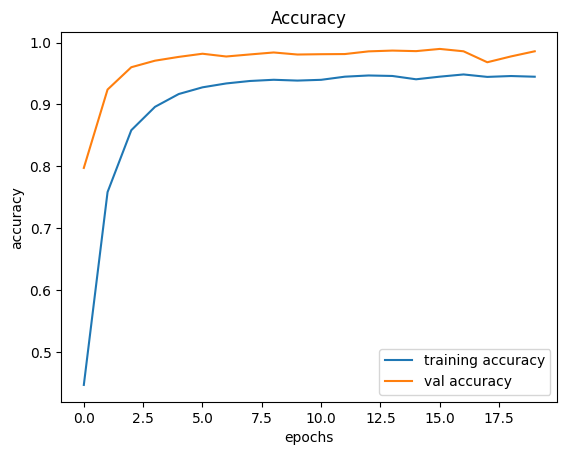

In [ ]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

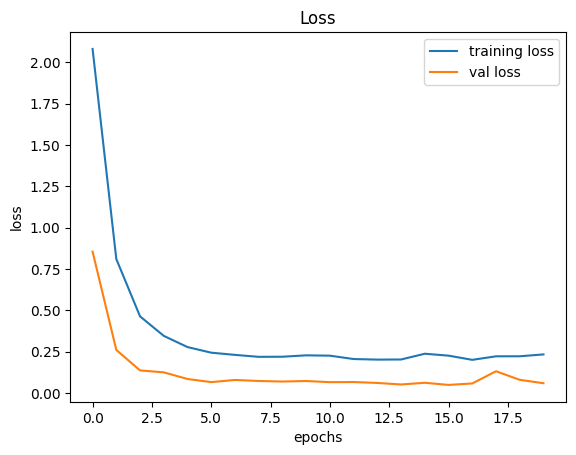

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('/content/gtsrb-german-traffic-sign/Test.csv')

In [ ]:
Y_pred_probabilities = model.predict(X_test)  # Get class probabilities for each sample in X_test
Y_pred = np.argmax(Y_pred_probabilities, axis=1)  # Get the class with the highest probability as the predicted class


395/395 [==============================] - 14s 35ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9498020585906571


In [ ]:
model.save("./training/TSR.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
os.chdir(r'/content/gtsrb-german-traffic-sign')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

1/1 [==============================] - 0s 198ms/step
Predicted traffic sign is: Speed limit (60km/h)


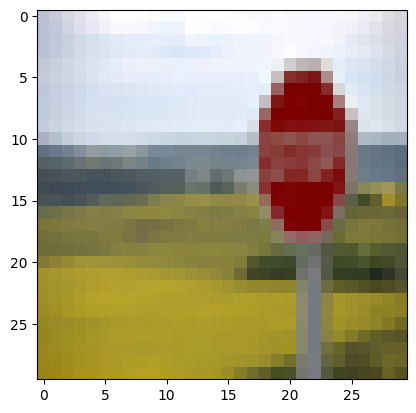

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define the path to your model and the number of classes
model_path = "/content/TSR.h5"  # Replace with the path to your saved model
classes =  { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

 # Define labels for all 43 classes in your dataset

# Load your model
from tensorflow.keras.models import load_model
model = load_model(model_path)

# Function to test on a single image
def test_on_img(image_path):
    image = Image.open(image_path)
    image = image.resize((30, 30))
    image = np.array(image)
    image = image.reshape(1, 30, 30, 3)  # Assuming the input shape of your model

    # Make a prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    return image, predicted_class

# Test on a single image
image_path = ''  # Replace with the path to your image
plot, prediction = test_on_img(image_path)
print("Predicted traffic sign is:", classes[prediction])

# Display the image and predicted class
plt.imshow(plot[0])
plt.show()


1/1 [==============================] - 0s 25ms/step


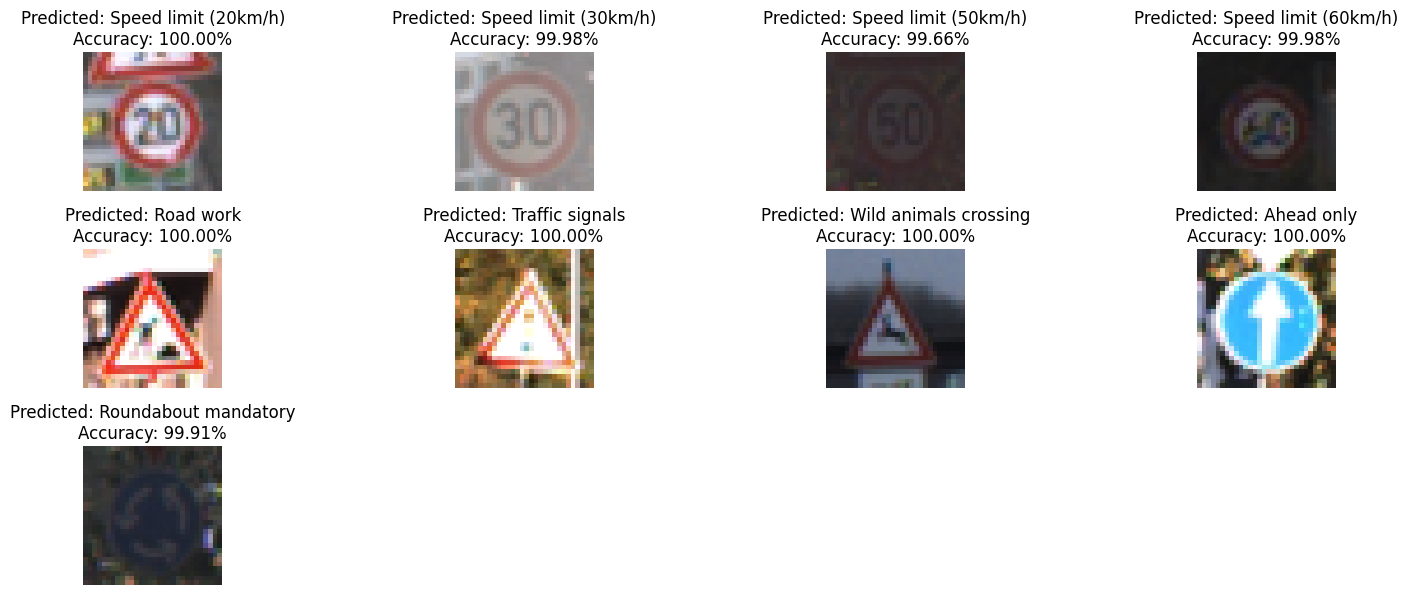

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define the path to your model and the number of classes
model_path = "/content/gtsrb-german-traffic-sign/training/TSR.h5"  # Replace with the path to your saved model
classes ={ 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }
# Load your model
from tensorflow.keras.models import load_model
model = load_model(model_path)

# Function to test on a single image
def test_on_img(image_path):
    image = Image.open(image_path)
    image = image.resize((30, 30))
    image = np.array(image)
    image = image.reshape(1, 30, 30, 3)  # Assuming the input shape of your model

    # Make a prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100  # Confidence in percentage

    return image, predicted_class, confidence

# List of image paths for different classes
image_paths =  [
    '/content/gtsrb-german-traffic-sign/train/0/00000_00000_00005.png',  # Image from class 0
    '/content/gtsrb-german-traffic-sign/train/1/00001_00000_00002.png',  # Image from class 1
    '/content/gtsrb-german-traffic-sign/train/2/00002_00000_00003.png',  # Image from class 2
    '/content/gtsrb-german-traffic-sign/train/3/00003_00000_00004.png',
    '/content/gtsrb-german-traffic-sign/train/25/00025_00000_00007.png',
    '/content/gtsrb-german-traffic-sign/train/26/00026_00000_00015.png',
    '/content/gtsrb-german-traffic-sign/train/31/00031_00000_00006.png',
    '/content/gtsrb-german-traffic-sign/train/35/00035_00000_00008.png',
    '/content/gtsrb-german-traffic-sign/train/40/00040_00000_00007.png'
    # Add more image paths for different classes here...
]

# Determine the number of rows and columns for subplots
num_images = len(image_paths)
num_rows = (num_images + 1) // 2  # Ensures odd number of images get proper rows
num_cols = 4

# Display images from different classes with accuracy
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(image_paths):
    plot, prediction, confidence = test_on_img(image_path)
    predicted_class = classes[prediction]

    # Display the image, predicted class, and accuracy
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(plot[0])
    plt.title(f"Predicted: {predicted_class}\nAccuracy: {confidence:.2f}%")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define the path to your model and the number of classes
model_path = "/content/TSR.h5"  # Replace with the path to your saved model
classes ={ 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }
# Load your model
from tensorflow.keras.models import load_model
model = load_model(model_path)

# Function to test on a single image
def test_on_img(image_path):
    image = Image.open(image_path)
    image = image.resize((30, 30))
    image = np.array(image)
    image = image.reshape(1, 30, 30, 3)  # Assuming the input shape of your model

    # Make a prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100  # Confidence in percentage

    return image, predicted_class, confidence

# List of image paths for different classes
image_paths =  [
    '/content/gtsrb-german-traffic-sign/train/4/00004_00000_00021.png'
    # Add more image paths for different classes here...
]

# Determine the number of rows and columns for subplots
num_images = len(image_paths)
num_rows = (num_images + 1) // 2  # Ensures odd number of images get proper rows
num_cols = 4

# Display images from different classes with accuracy
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(image_paths):
    plot, prediction, confidence = test_on_img(image_path)
    predicted_class = classes[prediction]

    # Display the image, predicted class, and accuracy
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(plot[0])
    plt.title(f"Predicted: {predicted_class}\nAccuracy: {confidence:.2f}%")
    plt.axis('off')

plt.tight_layout()
plt.show()

'/content/gtsrb-german-traffic-sign/train/4/00004_00000_00021.png'